 # Regressão usando Scikit Learn

    Curso - Let's Data - Jornada Cientista da Dados

### Motivação 

A ideia desse projeto é iniciar no mundo de Machine Learn, com separação de bases, avaliação de métricas, uso de cross validation, e ciração e comparação de modelos preditivos utilizando a bilioteca Scikit Learn. 

### Objeto de Estudo 

Vamos trabalhar com informações de planos de saúde! A área médica e de seguradoras de saúde utiliza muito as técnicas de ciência de dados e machine learning para avaliar risco dos seus segurados/pacientes. Vamos utilizar uma base de dados do livro "Machine Learning with R" de Brett Lantz, disponível aqui.

O problema que queremos solucionar é prever os gastos com planos de saúde de acordo com as características do segurado. Poderia ser um problema interessante tanto para os segurados (para saber quais características tornam seu plano mais caro ou barato), quanto para seguradoras (para que mantenha suas contas equilibradas e saiba os segurados que devem ter um preço mais alto/baixo).

In [1]:
# Importando as bibliotecas para criação dos gráficos e leitura dos dados 

import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import os 
import numpy as np 

# Configurando o pandas para mostrar todas as linhas e colunas 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Configurando pandas para não mostrar nootação científica para números   
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Fazendo a leitura do arquivo. Já vou criar uma variável desse df 

df_seguro = pd.read_csv('C:\insurance.csv')

df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [3]:
# Avaliando os tipos

df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
# Avaliando o df 

df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Começando com estatística descritiva 

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. Qual a distribuição da idade? Índice de massa corporal? E a variável target?

In [5]:
# Avaliando as informações de tendência central 

df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<AxesSubplot:xlabel='age', ylabel='Count'>

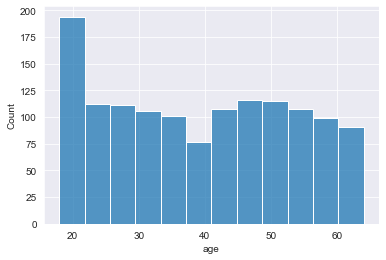

In [6]:
# Analizando as distribuições das idades 

sns.set_style('darkgrid')
plt.tight_layout()

sns.histplot(data=df_seguro, x='age')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

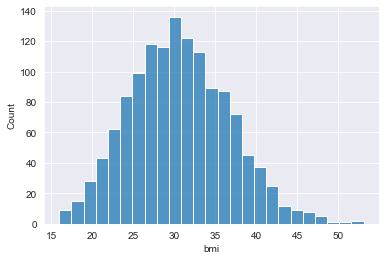

In [7]:
# Analisando as distribuições de índice de massa corporal 

sns.set_style('darkgrid')
plt.tight_layout()

sns.histplot(data=df_seguro, x='bmi')

<AxesSubplot:xlabel='children', ylabel='count'>

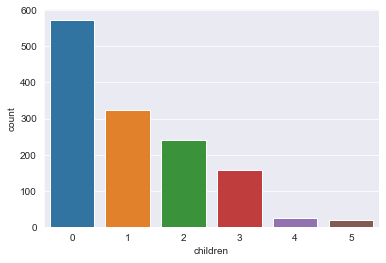

In [8]:
# Analisando a quantidade de crianças 

sns.set_style('darkgrid')
plt.tight_layout()


sns.countplot(data= df_seguro, x='children')

<AxesSubplot:xlabel='charges', ylabel='Count'>

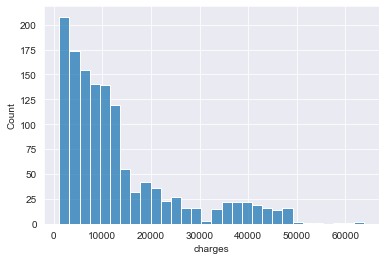

In [9]:
# Analisando a variável target: valor do seguro 

sns.histplot(data= df_seguro['charges'])

### Relação entre as features e a variável target 

Uma análise interessante é avaliar relações entre as variáveis preditoras com a target. Vamos analisar as dispersões das variáveis preditoras com o valor do seguro.

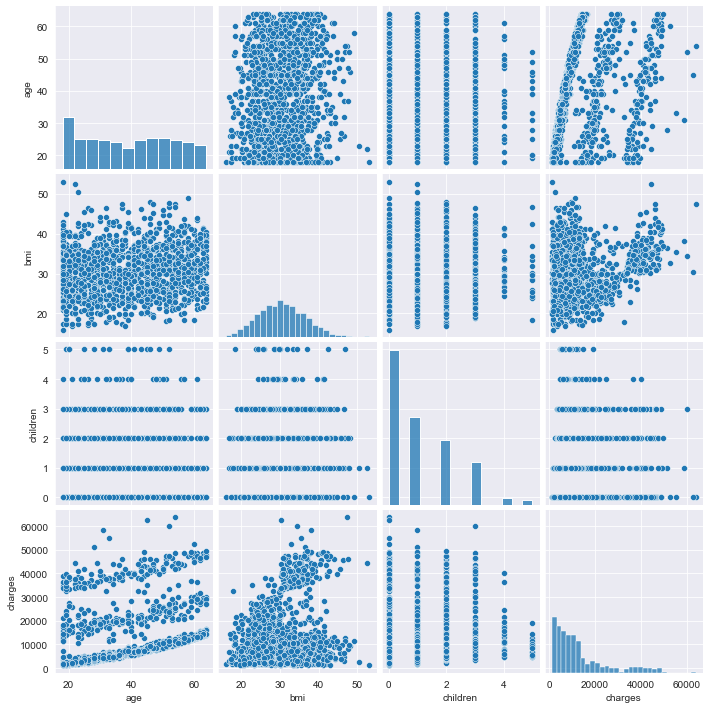

In [10]:
# O Pairplot faz gráficos dispersão para os pares de variáveis 

# Na diagonal principal ele mostra o histograma 

sns.pairplot(data=df_seguro)

Fica evidente uma correlação positiva entre idade e as cobranças de planos de saúde (age x charges). Provavelmente será uma variável de importância no modelo preditivo

### Codificação de Variáveis Categóricas 

Lembrando que os modelos de machine learning não sabem o que são categorias em sua maioria, devemos, portanto, 
codificar as variáveis de sexo, fumante e localização.
(Podemos utilizar o get_dummies do pandas, ou o OneHotEncoder do scikit learn)

In [11]:
# Vamos utilizar o One hot encoder, pois temos varáveis nominais 

# Para variáveis somente com duas classes (sex e smoker), podemos fazer um mapeamento direto

df_seguro['famale'] = df_seguro['sex'].map({'female': 1, 'male': 0})

df_seguro['smoker'] = df_seguro['smoker'].map({'yes': 1, 'no': 0})

df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,famale
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [12]:
# Como já colocamos a coluna 'famale' no df podemos apagar a coluna 'sex'

df_seguro = df_seguro.drop('sex', axis=1)

df_seguro.head()

,age,bmi,children,smoker,region,charges,famale
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [13]:
#Confirmando as regiões que tem df 

df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
# Para as regiões usar OHE. Vou criar uma nova variável

colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first=True)

colunas_regiao.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [15]:
# pd.concat: concatena pandas dataframes. Axis=1 (junta colunas ), axis=0 (junta linhas)

pd.concat([df_seguro, colunas_regiao], axis=1).head()



,age,bmi,children,smoker,region,charges,famale,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,0,0,1
1,18,33.77,1,0,southeast,1725.55,0,0,1,0
2,28,33.00,3,0,southeast,4449.46,0,0,1,0
3,33,22.70,0,0,northwest,21984.47,0,1,0,0
4,32,28.88,0,0,northwest,3866.86,0,1,0,0


In [16]:
# Salvando a contenação no df e apagando a coluna região

df_seguro = pd.concat([df_seguro, colunas_regiao], axis=1)

df_seguro = df_seguro.drop('region', axis=1)

df_seguro.head()

,age,bmi,children,smoker,charges,famale,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


In [17]:
df_seguro.head()

,age,bmi,children,smoker,charges,famale,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


## Determinando quem são variáveis preditoras e variável target 

In [18]:
# Tirando a variável dependente. Geralmente é indentificado com 'X'

X = df_seguro.drop('charges', axis=1)

#Extraindo a variável dependente. Que vamos identificar como y 

y = df_seguro[['charges']]

In [19]:
# Identificando as variáveis preditoras

X.head()

,age,bmi,children,smoker,famale,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [20]:
# Identificando a variável dependente ou target

y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


### Separação de bases 

Vamos usar cross validation 

In [21]:
# Função que separa nossa base de treino e teste

from sklearn.model_selection import train_test_split

In [22]:
# Devolve uma Tupla com 4 elementos: X de treino, X de teste, y de treino e y de teste 
# Passo minhas variáveis preditoras (X) e a variável target (y) 
# Em 'test_size' coloco que a base de teste de que ter 20% 
#'random_state' Controla o embaralhamento aplicado aos dados antes de aplicar a divisão. Passando um int 
#               para saída reproduzível em várias chamadas de função (Mantem a mesma reprodutibilidade)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)

In [23]:
# Vamos ver com quantas linhas ficamos no trino e no teste 

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((1070, 8), (268, 8), (1070, 1), (268, 1))

## Feature scaling

#### IMPORTANTE: que as transformações devam ser realizadas DEPOIS do split (separação).

Como usaremos pelo menos um modelo linear, é importante realizar scaling das features para mantê-las numa mesma escala de grandeza. Vamos de MinMaxScaler

In [24]:
# Dados antes da Normalização 

df_seguro.describe()

,age,bmi,children,smoker,charges,famale,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.49,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,12110.01,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,9382.03,0.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,63770.43,1.00,1.00,1.00,1.00


In [25]:
# Vou importar a função MinMaxScaler para fazer a Normalização 
# Se quisse fazer Padronização usaria StandardScaler 

from sklearn.preprocessing import MinMaxScaler

In [26]:
# Criando scaler 

scaler = MinMaxScaler()

In [27]:
#Parte importante: Fit treino (pega o menor e maior valor no treino) e Transforma. Transforma também o teste 
# Não transformamos todos, pois seria uma forma de conhecer os dados do teste  

colunas = X_treino.columns

X_treino[colunas] = scaler.fit_transform(X_treino)

X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape

((1070, 8), (268, 8))

In [28]:
#Dados depois da Normalização 

X_treino.describe()

,age,bmi,children,smoker,famale,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [29]:
X_teste.describe()

,age,bmi,children,smoker,famale,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


### Analisando a correlação entre variáveis 

Quando utilizamos modelos lineares, é importante saber se as variáveis preditoras guardam alguma colinearidade. Caso ocorra, devemos remover uma das variáveis para que o modelo não seja afetado.

<AxesSubplot:>

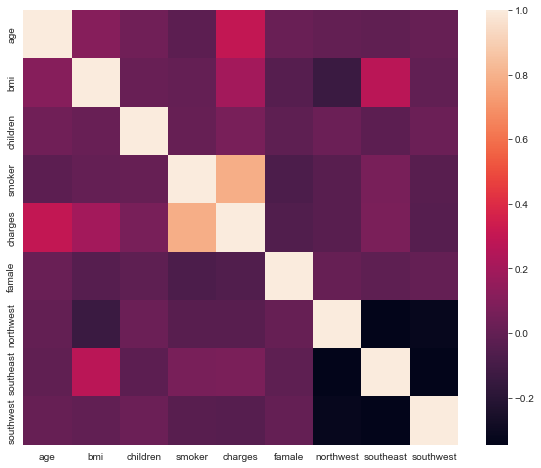

In [30]:
figura, graficos = plt.subplots(figsize=(10, 8))
corr = df_seguro.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), square=True, ax=graficos)

### Verificando dados faltantes 

In [31]:
# Isnull busca quem é nulo 

df_seguro.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
famale       0
northwest    0
southeast    0
southwest    0
dtype: int64

### Machine Learning 

Primeiro modelo que vamos treinar é a regressão linear. 

In [32]:
# Primeiro modelo que vamos treinar é a regressão linear. E vamos utilizar cross validation para evitar overfit 
#   e ter uma base de comparação para outros modelos

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score 


In [33]:
# Criando o estimador, algorimo, modelo, preditor, regresso

regressao_linear = LinearRegression()

#  Aqui vamos fazer o cross validation da base de treinamento 'X=X_treino, y=y_treino';
# 'cv=10': Indica que vai separar em 10 parte (10 fold); 
# 'estimator=regressao_linear': algoritimo de aprendizagem;
# 'scoring': vai retornar o rmse (Erro de predição em cada split) 

valores_rmse_rl = cross_val_score(estimator=regressao_linear,
                                  X=X_treino,  
                                  y=y_treino, 
                                  cv=10, 
                                  scoring='neg_root_mean_squared_error') 

valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [34]:
# Transformando em positivo 

valores_rmse_rl = valores_rmse_rl * -1

valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [35]:
#Tirando a média 

media_rmse_rl = valores_rmse_rl.mean()

media_rmse_rl

6133.0839262055

### Árvore de Regressão 

In [36]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

valores_rmse_arvore = cross_val_score(estimator=arvore_regressao, 
                                      X=X_treino, 
                                      y=y_treino, 
                                      cv=10, # 
                                  scoring='neg_root_mean_squared_error')
valores_rmse_arvore

array([-6442.26265838, -7497.11028889, -7083.03688757, -7382.00284059,
       -6891.93742811, -6591.4459975 , -7015.90627965, -7044.16307463,
       -6262.87852476, -6322.87399756])

In [37]:
valores_rmse_arvore = valores_rmse_arvore * -1

valores_rmse_arvore

array([6442.26265838, 7497.11028889, 7083.03688757, 7382.00284059,
       6891.93742811, 6591.4459975 , 7015.90627965, 7044.16307463,
       6262.87852476, 6322.87399756])

In [38]:
media_rmse_arvore = valores_rmse_arvore.mean()

media_rmse_arvore

6853.3617977641625

### Tirando variáveis 

Na análise de correlação as variáveis das colunas de regiões não apresentaram muita influencia na variável target  

Podemos analisar se retiramos elas melhora o resultado 

In [39]:
#Fazendo o croos validation com regressão linear sem as regiões 

colunas_regiao = ['northwest', 'southeast', 'southwest']

valores_rmse_rl_sem_regiao = cross_val_score(estimator=regressao_linear,
                                  X=X_treino.drop(colunas_regiao, axis=1),  
                                  y=y_treino, 
                                  cv=10, 
                                  scoring='neg_root_mean_squared_error')

valores_rmse_rl_sem_regiao.mean() * -1

6121.545062597132

In [40]:
# Covertendo todos para positivo 

valores_rmse_rl_sem_regiao = valores_rmse_rl_sem_regiao * -1

valores_rmse_rl_sem_regiao 

array([6047.74861144, 6576.17442833, 5208.18399508, 5969.09583538,
       5870.19697933, 6107.50898187, 7295.03885205, 6309.72867769,
       6178.86188095, 5652.91238386])

In [41]:
#Fazendo o croos validation com árvore de regressão sem as regiões

colunas_regiao = ['northwest', 'southeast', 'southwest']

valores_rmse_arvore_sem_regiao = cross_val_score(estimator=arvore_regressao,
                                  X=X_treino.drop(colunas_regiao, axis=1),  
                                  y=y_treino, 
                                  cv=10, 
                                  scoring='neg_root_mean_squared_error')

valores_rmse_arvore_sem_regiao.mean() * -1

6894.061351134394

In [42]:
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao * -1

Text(0.5, 1.0, 'Comparação de RMSE')

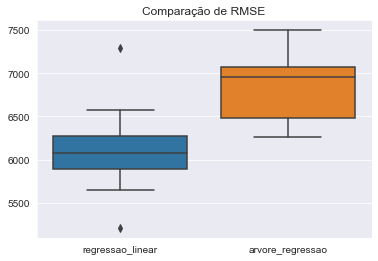

In [43]:
# Comparando os erros dos dois melhores algoritmos (valores_rmse_rl_sem_regiao / valores_rmse_arvore) 

rmse = pd.DataFrame({'regressao_linear':valores_rmse_rl_sem_regiao, 'arvore_regressao': valores_rmse_arvore})

sns.boxplot(data=rmse).set_title('Comparação de RMSE')

### Melhor Modelo 

#### O melhor modelo foi Regressão Linear sem as colunas de região

Dessa maneira, vamos treinar em toda a base de treinamento 

In [44]:
# Treinando (fit) o modelo na base de treinamento sem cross validation 

regressao_linear.fit(X_treino.drop(colunas_regiao, axis=1), y_treino)

LinearRegression()

In [45]:
regressao_linear.coef_

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [46]:
# Facilitando a analise colocando em df para verificar qual impacto das variáveis na hora de determinar o preço dos planos 

df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns = regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,famale
0,11825.17,12174.42,2136.27,23653.90,7.95


In [47]:
# Calculandp o p-valor dos coeficientes de cada regressão verificamos se coeficientes são válidos estatisticamente (menor 0.05) 

import statsmodels.api as sm

rl_statsmodels = sm.OLS(y_treino, X_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']

p_valores



age        0.00
bmi        0.00
children   0.07
smoker     0.00
famale     0.21
Name: P>|t|, dtype: float64

Os coeficientes para crianças e sexo não são estatisticamente válidos

### Fazer inferências dos valores do plano de saúde no teste

In [48]:
# Estimadores scikit learn
# estimador é treinado com fit
# estimador prediz com predict

precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))

precos_preditos[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [49]:
# Criando o df com os valores preditos, reias e a diferença absoluta entre eles 

predicoes_vs_real = pd.DataFrame({'predicao': precos_preditos.flatten(), 'real': y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs'] = abs(predicoes_vs_real['predicao'] - predicoes_vs_real['real'])

predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


### R squared 

In [50]:
from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.7811302113434095